#1.Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objects as go
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Projects/project_new/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

#2. Understanding the Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df['customerID'].nunique()

7043

In [ ]:
# Drop this column since we no longer need it
df.drop('customerID', axis=1, inplace=True)

##2.1 Checking Duplicate Values

In [ ]:
copies = df.duplicated(subset=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                               'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
                               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                               'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                               'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'])

In [ ]:
copies.value_counts()

False    7021
True       22
dtype: int64

Those 22 'duplicates' but have the same characteristics - people in their first month of payments who had the same services and had paid the same amount. Because of that we will not drop the duplicate values.

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
for i in df.columns:
    if df[i].dtypes=="object":
        print(f'{i} : {df[i].unique()}')
        print("****************************************************")

gender : ['Female' 'Male']
****************************************************
Partner : ['Yes' 'No']
****************************************************
Dependents : ['No' 'Yes']
****************************************************
PhoneService : ['No' 'Yes']
****************************************************
MultipleLines : ['No phone service' 'No' 'Yes']
****************************************************
InternetService : ['DSL' 'Fiber optic' 'No']
****************************************************
OnlineSecurity : ['No' 'Yes' 'No internet service']
****************************************************
OnlineBackup : ['Yes' 'No' 'No internet service']
****************************************************
DeviceProtection : ['No' 'Yes' 'No internet service']
****************************************************
TechSupport : ['No' 'Yes' 'No internet service']
****************************************************
StreamingTV : ['No' 'Yes' 'No internet service']
*******************

# 3. Visualization

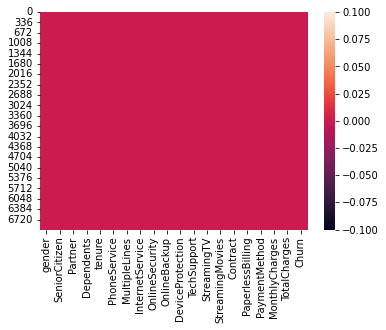

In [ ]:
# Visualization of null values

sns.heatmap(df.isnull())

In [ ]:
# Checking Correlation 

df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


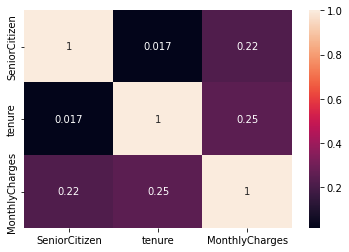

In [ ]:
# Visualizing correalation

sns.heatmap(df.corr(), annot=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
# Here totalcharges are object types so we need to change it into numeric format
df['TotalCharges'].dtype

dtype('O')

In [ ]:
# Changing in numeric format

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors="coerce")

In [ ]:
# Checking for null values 

df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# Dropping all the rows in which value in not known

df.drop(df[df['TotalCharges'].isnull()].index, inplace=True)
df.reset_index(drop=True, inplace=True)

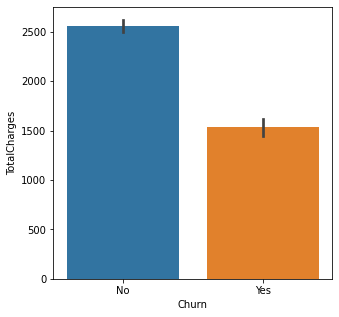

In [ ]:
plt.figure(figsize=(5, 5))
sns.barplot(data = df, y="TotalCharges", x="Churn")

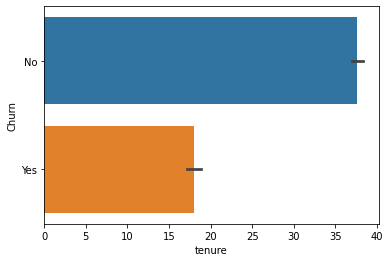

In [ ]:
sns.barplot(data = df, x="tenure", y="Churn")

## 3.1 Plotly

https://ecyy.medium.com/data-visualisation-how-to-plot-a-scatter-bubble-chart-by-plotly-d987c8cc6a3

In [ ]:
# Importing high-level chart objects
import plotly.graph_objs as go

In [ ]:
from scipy import stats 
from plotly.offline import iplot, init_notebook_mode 
import plotly.graph_objs as go



In [ ]:
fig = px.scatter(df, y="TotalCharges", x="tenure")
fig.show(renderer="colab")

In [ ]:
diag = px.histogram(df, x="Churn", color="SeniorCitizen")
diag.update_layout(width=750, height=550)
diag.show(renderer="colab")

In [ ]:
#diag = px.pie(df, values='TotalCharges', names='Churn', hole=0.5)
#diag.show()

In [ ]:
labels = df['MultipleLines'].unique()
values = df['MultipleLines'].value_counts()

# pull is given as a fraction of the pie radius
diag = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0.1, 0.2])])
diag.show(renderer="colab")

In [ ]:
labels = df['InternetService'].unique()
values = df['InternetService'].value_counts()


diag = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0.2, 0.3])])
diag.show(renderer="colab")

In [ ]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()


diag = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0, 0.2, 0])])
diag.show(renderer="colab")

In [ ]:
labels = df['Contract'].unique()
values = df['Contract'].value_counts()


diag = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0.2, 0.3])])
diag.show(renderer="colab")

#4. Feature engineering

##4.1 Making Categorical Columns Numerical

In [ ]:
# Coded binary categories as 0 and 1 in preparation for regression
binary_dict = {'No': 0, 'No internet service': 0, 'No phone service': 0, 'Yes': 1}

def convert_cols_to_binary(col_names: list):
    for col in col_names:
        df[col] = df[col].map(binary_dict)


cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

convert_cols_to_binary(cols)

In [ ]:
# Code gender as binary
gender_dict = {'Male': 0, 'Female': 1}
df['gender'] = df['gender'].map(gender_dict)

# Rename column to 'female' since 1's now represent females
df.rename(columns={'gender': 'female'})

,female,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7028,1,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7029,1,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7030,0,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [ ]:
# Recast binary columns as integers, as some of them were floats
df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies']].astype('int')

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0,1,0,0,0,0
1,1,0,1,0,0,0
2,1,1,0,0,0,0
3,1,0,1,1,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
7027,1,0,1,1,1,1
7028,0,1,1,0,1,1
7029,1,0,0,0,0,0
7030,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   object 


In [ ]:
# Dropping the 11 ' ' values from TotalCharges column
df = df[df['TotalCharges']!=' ']

# Then recast the column as float
df['TotalCharges'] = df['TotalCharges'].astype('float')

# Created new feature column to measure average monthly charges
df['AvgMonthlyCharges'] = df['TotalCharges']/df['tenure']

In [ ]:
# Change name of columnns for dataframe to make it more easier to read and work with
df.columns = ['gender', 'senior', 'partner', 'dependents', 'tenure',
              'phone_service', 'multiple_lines', 'internet_service', 'online_security', 'online_backup',
              'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
              'contract', 'paperless_billing', 'payment_method', 'monthly_charges', 'total_charges', 'churn',
              'avg_monthly_charges']


In [ ]:
# # Save output as CSV
# df.to_csv('data/clean_data.csv', index=False)


## 4.2 Deeply Analyzing the Data And Feature Extracting

In [ ]:
df.head()

,gender,senior,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn,avg_monthly_charges
0,1,0,1,0,1,0,0,DSL,0,1,...,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,29.850000
1,0,0,0,0,34,1,0,DSL,1,0,...,0,0,0,One year,0,Mailed check,56.95,1889.50,0,55.573529
2,0,0,0,0,2,1,0,DSL,1,1,...,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,54.075000
3,0,0,0,0,45,0,0,DSL,1,0,...,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,40.905556
4,1,0,0,0,2,1,0,Fiber optic,0,0,...,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,75.825000


In [ ]:
df['monthly_charges'].describe()


count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: monthly_charges, dtype: float64

In [ ]:
df['tenure'].describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [ ]:
df['internet_service'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: internet_service, dtype: int64

In [ ]:
df.groupby(df['internet_service'])['monthly_charges'].mean()

internet_service
DSL            58.088017
Fiber optic    91.500129
No             21.076283
Name: monthly_charges, dtype: float64

In [ ]:
x = df.groupby(df['tenure'])['monthly_charges'].mean()

In [ ]:
df.groupby(df['phone_service'])['monthly_charges'].mean()

phone_service
0    41.992500
1    67.239625
Name: monthly_charges, dtype: float64

In [ ]:
df.columns

Index(['gender', 'senior', 'partner', 'dependents', 'tenure', 'phone_service',
       'multiple_lines', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'contract', 'paperless_billing', 'payment_method',
       'monthly_charges', 'total_charges', 'churn', 'avg_monthly_charges'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               7032 non-null   int64  
 1   senior               7032 non-null   int64  
 2   partner              7032 non-null   int64  
 3   dependents           7032 non-null   int64  
 4   tenure               7032 non-null   int64  
 5   phone_service        7032 non-null   int64  
 6   multiple_lines       7032 non-null   int64  
 7   internet_service     7032 non-null   object 
 8   online_security      7032 non-null   int64  
 9   online_backup        7032 non-null   int64  
 10  device_protection    7032 non-null   int64  
 11  tech_support         7032 non-null   int64  
 12  streaming_tv         7032 non-null   int64  
 13  streaming_movies     7032 non-null   int64  
 14  contract             7032 non-null   object 
 15  paperless_billing    7032 non-null   i

In [ ]:
print(df['internet_service'].value_counts(ascending=True))

No             1520
DSL            2416
Fiber optic    3096
Name: internet_service, dtype: int64


In [ ]:
for i in df.columns:
    if (len(df[i].unique()) >2) & (df[i].dtypes != "int64") &(df[i].dtypes!= "float64"):
        print(i)

internet_service
contract
payment_method


In [ ]:
print(df['internet_service'].value_counts(ascending=True))

No             1520
DSL            2416
Fiber optic    3096
Name: internet_service, dtype: int64


In [ ]:
print(df['contract'].value_counts(ascending=True))

One year          1472
Two year          1685
Month-to-month    3875
Name: contract, dtype: int64


In [ ]:
print(df['payment_method'].value_counts(ascending=True))

Credit card (automatic)      1521
Bank transfer (automatic)    1542
Mailed check                 1604
Electronic check             2365
Name: payment_method, dtype: int64


In [ ]:
#How many unique values on every column.
for col in df.columns:
    print(col, df[col].nunique())

gender 2
senior 2
partner 2
dependents 2
tenure 72
phone_service 2
multiple_lines 2
internet_service 3
online_security 2
online_backup 2
device_protection 2
tech_support 2
streaming_tv 2
streaming_movies 2
contract 3
paperless_billing 2
payment_method 4
monthly_charges 1584
total_charges 6530
churn 2
avg_monthly_charges 6585


In [ ]:
more_than_2 = ['internet_service' ,'contract' ,'payment_method']
df = pd.get_dummies(data=df, columns= more_than_2)
df.dtypes

gender                                        int64
senior                                        int64
partner                                       int64
dependents                                    int64
tenure                                        int64
phone_service                                 int64
multiple_lines                                int64
online_security                               int64
online_backup                                 int64
device_protection                             int64
tech_support                                  int64
streaming_tv                                  int64
streaming_movies                              int64
paperless_billing                             int64
monthly_charges                             float64
total_charges                               float64
churn                                         int64
avg_monthly_charges                         float64
internet_service_DSL                          uint8
internet_ser

In [ ]:
df.shape

(7032, 28)

In [ ]:
df.columns

Index(['gender', 'senior', 'partner', 'dependents', 'tenure', 'phone_service',
       'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'churn',
       'avg_monthly_charges', 'internet_service_DSL',
       'internet_service_Fiber optic', 'internet_service_No',
       'contract_Month-to-month', 'contract_One year', 'contract_Two year',
       'payment_method_Bank transfer (automatic)',
       'payment_method_Credit card (automatic)',
       'payment_method_Electronic check', 'payment_method_Mailed check'],
      dtype='object')

In [ ]:
#numerical columns
for i in df.columns:
    if (df[i].dtypes == "int64")  | (df[i].dtypes== "float64"):
        print(i)

gender
senior
partner
dependents
tenure
phone_service
multiple_lines
online_security
online_backup
device_protection
tech_support
streaming_tv
streaming_movies
paperless_billing
monthly_charges
total_charges
churn
avg_monthly_charges


# 5. Train Test Split

In [ ]:
# Splitting Dataset into train and test set

X = df.drop('churn', axis=1)
y = df['churn']

In [ ]:
X.shape, y.shape

((7032, 27), (7032,))

In [ ]:
# Performing Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

#6. MinMaxScaler

In [ ]:
# Using MinMaxScaler of Feature Scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
large_cols = ["tenure", "monthly_charges", "total_charges"]
df[large_cols] = scaler.fit_transform(df[large_cols])
df[large_cols].head()

,tenure,monthly_charges,total_charges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330


In [ ]:
df.head()

,gender,senior,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,internet_service_DSL,internet_service_Fiber optic,internet_service_No,contract_Month-to-month,contract_One year,contract_Two year,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


#7. Model Building

##7.1 Using Logistics Regression

In [ ]:
# Importing Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
# creating object for model
model_lg = LogisticRegression(max_iter=120,random_state=0, n_jobs=20)

In [ ]:
# Model Training

model_lg.fit(X_train, y_train)

LogisticRegression(max_iter=120, n_jobs=20, random_state=0)

In [ ]:
# Making Predictions
pred_lg = model_lg.predict(X_test)

In [ ]:
# Calculating Accuracy of the model

lg = round(accuracy_score(y_test, pred_lg)*100,2)
print(lg)

79.97


In [ ]:
# Classification Report

print(classification_report(y_test, pred_lg))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1711
           1       0.64      0.54      0.59       610

    accuracy                           0.80      2321
   macro avg       0.74      0.72      0.73      2321
weighted avg       0.79      0.80      0.79      2321



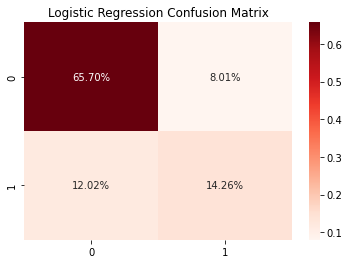

In [ ]:
# confusion Matrix

cm1 = confusion_matrix(y_test, pred_lg)
sns.heatmap(cm1/np.sum(cm1), annot=True, fmt='0.2%', cmap="Reds")
plt.title("Logistic Regression Confusion Matrix",fontsize=12)
plt.show()

##7.2 Using decision Tree Classifer

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Creating object of the model
model_dt = DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
pred_dt = model_dt.predict(X_test)

In [ ]:
dt  = round(accuracy_score(y_test, pred_dt)*100, 2)
print(dt)   

78.93


In [ ]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1711
           1       0.63      0.48      0.54       610

    accuracy                           0.79      2321
   macro avg       0.73      0.69      0.70      2321
weighted avg       0.78      0.79      0.78      2321



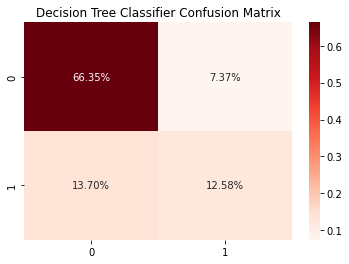

In [ ]:
# confusion Maxtrix
cm2 = confusion_matrix(y_test, pred_dt)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.title("Decision Tree Classifier Confusion Matrix",fontsize=12)
plt.show()

##7.3 Using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Creating model object
model_rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42)

In [ ]:
# Training Model
model_rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=0.16, n_estimators=300, random_state=42)

In [ ]:
# Making Prediction
pred_rf = model_rf.predict(X_test)

In [ ]:
# Calculating Accuracy Score
rf = round(accuracy_score(y_test, pred_rf)*100, 2)
print(rf)

73.72


In [ ]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1711
           1       0.00      0.00      0.00       610

    accuracy                           0.74      2321
   macro avg       0.37      0.50      0.42      2321
weighted avg       0.54      0.74      0.63      2321



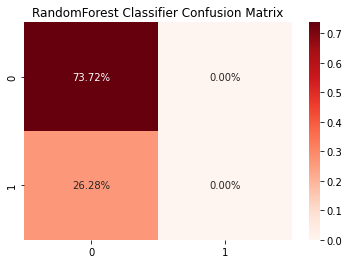

In [ ]:
# confusion Maxtrix
cm3 = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.title("RandomForest Classifier Confusion Matrix",fontsize=12)
plt.show()

##7.4 Using XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Creating model object
model_xgb = XGBClassifier(max_depth= 8, n_estimators= 125, random_state= 0,  learning_rate= 0.03, n_jobs=5)

In [ ]:
# Training Model
model_xgb.fit(X_train, y_train)

XGBClassifier(learning_rate=0.03, max_depth=8, n_estimators=125, n_jobs=5)

In [ ]:
# Making Prediction
pred_xgb = model_xgb.predict(X_test)

In [ ]:
# Calculating Accuracy Score
xgb = round(accuracy_score(y_test, pred_xgb)*100, 2)
print(xgb)

79.45


In [ ]:
print(classification_report(y_test,pred_xgb))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1711
           1       0.63      0.54      0.58       610

    accuracy                           0.79      2321
   macro avg       0.74      0.71      0.72      2321
weighted avg       0.79      0.79      0.79      2321



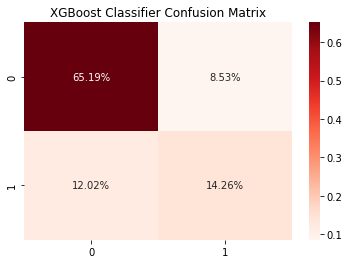

In [ ]:
# confusion Maxtrix
cm4 = confusion_matrix(y_test, pred_xgb)
sns.heatmap(cm4/np.sum(cm4), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.title("XGBoost Classifier Confusion Matrix",fontsize=12)
plt.show()

##7.5 Using KNeighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Creating model object
model_kn = KNeighborsClassifier(n_neighbors=9, leaf_size=20)

In [ ]:
# Training Model
model_kn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=20, n_neighbors=9)

In [ ]:
# Making Prediction
pred_kn = model_kn.predict(X_test)

In [ ]:
# Calculating Accuracy Score
kn = round(accuracy_score(y_test, pred_kn)*100, 2)
print(kn)

78.16


In [ ]:
print(classification_report(y_test,pred_kn))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1711
           1       0.62      0.44      0.51       610

    accuracy                           0.78      2321
   macro avg       0.72      0.67      0.69      2321
weighted avg       0.77      0.78      0.77      2321



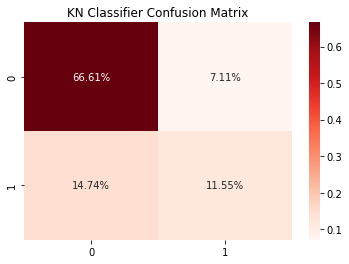

In [ ]:
# confusion Maxtrix
cm5 = confusion_matrix(y_test, pred_kn)
sns.heatmap(cm5/np.sum(cm5), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.title("KN Classifier Confusion Matrix",fontsize=12)
plt.show()

##7.6 Using SVM

In [ ]:
from sklearn.svm import SVC, LinearSVC

In [ ]:
model_svm = SVC(kernel='rbf', random_state = 42)

In [ ]:
model_svm.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
# Making Prediction
pred_svm = model_svm.predict(X_test)

In [ ]:
# Calculating Accuracy Score
sv = round(accuracy_score(y_test, pred_svm)*100, 2)
print(sv)

73.72


In [ ]:
print(classification_report(y_test,pred_kn))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1711
           1       0.62      0.44      0.51       610

    accuracy                           0.78      2321
   macro avg       0.72      0.67      0.69      2321
weighted avg       0.77      0.78      0.77      2321



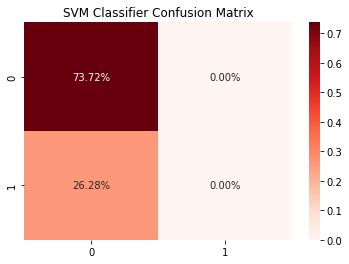

In [ ]:
# confusion Maxtrix
cm6 = confusion_matrix(y_test, pred_svm)
sns.heatmap(cm6/np.sum(cm6), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.title("SVM Classifier Confusion Matrix",fontsize=12)
plt.show()


##7.7 Using AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
model_ada = AdaBoostClassifier(learning_rate= 0.002,n_estimators= 205,random_state=42)

In [ ]:
model_ada.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.002, n_estimators=205, random_state=42)

In [ ]:
# Making Prediction
pred_ada = model_ada.predict(X_test)

In [ ]:
# Calculating Accuracy Score
ada = round(accuracy_score(y_test, pred_ada)*100, 2)
print(ada)

73.72


In [ ]:
print(classification_report(y_test,pred_ada))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1711
           1       0.00      0.00      0.00       610

    accuracy                           0.74      2321
   macro avg       0.37      0.50      0.42      2321
weighted avg       0.54      0.74      0.63      2321



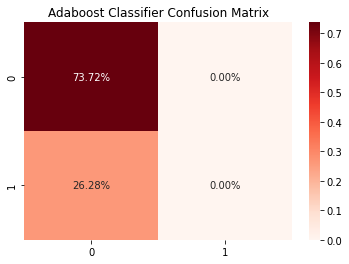

In [ ]:
# confusion Maxtrix
cm7 = confusion_matrix(y_test, pred_ada)
sns.heatmap(cm7/np.sum(cm7), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.title("Adaboost Classifier Confusion Matrix",fontsize=12)
plt.show()

##7.8 Handling Imbalance dataset Using SMOTE and apply Random Forest Algorithm

In [ ]:
df.head()

,gender,senior,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,internet_service_DSL,internet_service_Fiber optic,internet_service_No,contract_Month-to-month,contract_One year,contract_Two year,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [ ]:
oversample = SMOTE()

In [ ]:
X1, y1 = oversample.fit_resample(X,y)

In [ ]:
X1.shape, y1.shape

((10326, 27), (10326,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X1, y1, test_size=0.33, random_state=0)

In [ ]:
model_rf_smt=RandomForestClassifier(criterion = "gini",random_state = 10,max_depth=10, min_samples_leaf=5)

In [ ]:
model_rf_smt.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, random_state=10)

In [ ]:
pred_rf_smt = model_rf_smt.predict(X_test)

In [ ]:
rf_smt  = round(accuracy_score(y_test, pred_rf_smt)*100, 2)
print(rf_smt)   

84.68


In [ ]:
print(classification_report(y_test, pred_rf_smt))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1695
           1       0.83      0.88      0.85      1713

    accuracy                           0.85      3408
   macro avg       0.85      0.85      0.85      3408
weighted avg       0.85      0.85      0.85      3408



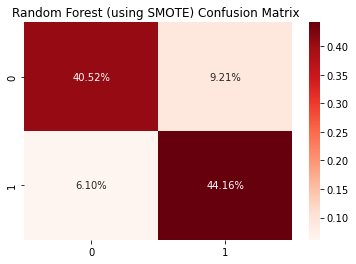

In [ ]:
cm8 = confusion_matrix(y_test, pred_rf_smt)
sns.heatmap(cm8/np.sum(cm8), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.title("Random Forest (using SMOTE) Confusion Matrix ",fontsize=12)
plt.show()

#8. Final Results

,Model,Accuracy_score
7,Random Forest 'SMOTE',84.68
0,Logistic Regression,79.97
3,XGBoost,79.45
1,Decision Tree,78.93
4,KNeighbours,78.16
2,Random Forest,73.72
5,SVM,73.72
6,AdaBoost,73.72


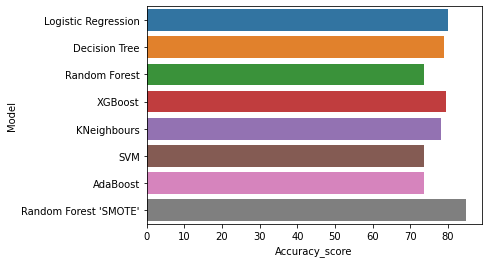

In [ ]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'KNeighbours', 'SVM', 'AdaBoost', 'Random Forest \'SMOTE\''],
    'Accuracy_score' :[lg, dt, rf, xgb, kn, sv, ada, rf_smt]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)